In [1]:
import pandas as pd
import numpy as np

In [2]:
#Input data
pathname = "./result/"
cop = pd.read_csv(pathname+"PairWiseCopula.csv")
cop_rowlag = pd.read_csv(pathname+"PairWiseCopula_rowlag.csv")
cop_collag = pd.read_csv(pathname+"PairWiseCopula_collag.csv")

In [3]:
# Output path
arrow_fig = "Arrows90%representing Copula Significance.png"
copname_fig = "90%CopulaParameters.png"

In [4]:
col = {'SET':1,'MAI':2,'ZeroShort':3,'ZeroLong':4,'CorpBond':5,'THB':6,'BondFlow':7,
 'EquityFlow':8,'EMAsiaEquity':9, 'SP500':10, 'EMBond':11, 'USBond':12, 'EMAsiaFX':13,'USD':14}

In [5]:
# level of significant
sig = 0.1

## Table

In [11]:
#count copulaBest
print(cop['CopulaBest'].value_counts())

t                              56
Survival Gumbel                13
Clayton                         9
Rotated Gumbel 270 degrees      5
Frank                           4
Rotated Clayton 90 degrees      1
Gaussian                        1
Rotated Clayton 270 degrees     1
Rotated Gumbel 90 degrees       1
Name: CopulaBest, dtype: int64


In [12]:
print(cop_rowlag['CopulaBest'].value_counts())

t                             52
Clayton                       11
Survival Gumbel                9
Gaussian                       6
Rotated Gumbel 270 degrees     5
Frank                          4
Rotated Gumbel 90 degrees      2
Gumbel                         1
Rotated Clayton 90 degrees     1
Name: CopulaBest, dtype: int64


In [14]:
print(cop_collag['CopulaBest'].value_counts())

t                              52
Clayton                        11
Survival Gumbel                 8
Rotated Gumbel 90 degrees       4
Rotated Gumbel 270 degrees      3
Gaussian                        3
Frank                           3
Gumbel                          2
Rotated Clayton 270 degrees     2
Survival Clayton                2
Rotated Clayton 90 degrees      1
Name: CopulaBest, dtype: int64


In [15]:
# rename CopulaBest
cop_rowlag=cop_rowlag.replace({'Rotated Gumbel 90 degrees':'Gumbel 90', 'Survival Gumbel':'Gumbel 180','Rotated Gumbel 270 degrees':'Gumbel 270',
                    'Rotated Joe 90 degrees':'Joe 90','Survival Joe':'Joe 180', 'Rotated Joe 270 degrees':'Joe 270',
                    'Rotated Clayton 90 degrees':'Clayton 90', 'Survival Clayton':'Clayton 180','Rotated Clayton 270 degrees':'Clayton 270',
                    'Survival BB1':'BB1 180','Survival BB7':'BB7 180','Survival BB8':'BB8 180'})
cop=cop.replace({'Rotated Gumbel 90 degrees':'Gumbel 90', 'Survival Gumbel':'Gumbel 180','Rotated Gumbel 270 degrees':'Gumbel 270',
                    'Rotated Joe 90 degrees':'Joe 90','Survival Joe':'Joe 180', 'Rotated Joe 270 degrees':'Joe 270',
                    'Rotated Clayton 90 degrees':'Clayton 90', 'Survival Clayton':'Clayton 180','Rotated Clayton 270 degrees':'Clayton 270',
                    'Survival BB1':'BB1 180','Survival BB7':'BB7 180','Survival BB8':'BB8 180'})
cop_collag=cop_collag.replace({'Rotated Gumbel 90 degrees':'Gumbel 90', 'Survival Gumbel':'Gumbel 180','Rotated Gumbel 270 degrees':'Gumbel 270',
                    'Rotated Joe 90 degrees':'Joe 90','Survival Joe':'Joe 180', 'Rotated Joe 270 degrees':'Joe 270',
                    'Rotated Clayton 90 degrees':'Clayton 90', 'Survival Clayton':'Clayton 180','Rotated Clayton 270 degrees':'Clayton 270',
                    'Survival BB1':'BB1 180','Survival BB7':'BB7 180','Survival BB8':'BB8 180'})

In [16]:
# join all table
df=cop.copy()
df_rl=cop_rowlag.copy()
df_cl=cop_collag.copy()

df_all = df_rl.merge(df_cl,left_on=["ColVariable","RowLagVariable"],
                     right_on=["ColLagVariable","RowVariable"],
                     suffixes=['_rowlag','_collag']).drop(columns=['ColLagVariable','RowLagVariable'])
df_all = df.merge(df_all,left_on=["ColVariable","RowVariable"],right_on=["ColVariable","RowVariable"])
df_all = df_all.round(3)

In [17]:
# create empty dataframe
data = pd.DataFrame(columns=list(col.keys()),index=list(col.keys()))

In [18]:
# insert significant copula name, copula parameter to dataframe     
for index, row in df_all.iterrows():
    if row['CopulaBest']!='t':
        nolag = row['CopulaBest']+'('+str(row['CopulaBestParam1'])+')'
    else:
        nolag = row['CopulaBest']+'('+str(row['CopulaBestParam1'])+','+str(row['CopulaBestParam2'])+')'
#     data['NoLag_cop'][index]=nolag
    
    if row['CopulaBest_rowlag']!='t':
        rowlag = row['CopulaBest_rowlag']+'('+str(row['CopulaBestParam1_rowlag'])+')'
    else:
        rowlag = row['CopulaBest_rowlag']+'('+str(row['CopulaBestParam1_rowlag'])+','+str(row['CopulaBestParam2_rowlag'])+')'
#     data['RowLag_cop'][index]=rowlag
    
    if row['CopulaBest_collag']!='t':
        collag = row['CopulaBest_collag']+'('+str(row['CopulaBestParam1_collag'])+')'
    else:
        collag = row['CopulaBest_collag']+'('+str(row['CopulaBestParam1_collag'])+','+str(row['CopulaBestParam2_collag'])+')'
#     data['ColLag_cop'][index]=collag
    
    
    data.loc[row['RowVariable'],row['ColVariable']]= rowlag +'\n'+ nolag+'\n'+ collag

In [19]:
data.replace(np.nan, '\n\n',inplace = True)

In [20]:
data

,SET,MAI,ZeroShort,ZeroLong,CorpBond,THB,BondFlow,EquityFlow,EMAsiaEquity,SP500,EMBond,USBond,EMAsiaFX,USD
SET,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
MAI,"t(0.01,7.131)\nGumbel 180(1.855)\nt(0.105,7.396)",\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
ZeroShort,"t(-0.0,7.34)\nt(0.012,5.636)\nt(-0.018,5.956)",Gumbel(1.003)\nGumbel 180(1.012)\nGumbel 90(-1...,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
ZeroLong,"t(-0.022,8.488)\nt(0.029,4.717)\nt(-0.012,7.74)","t(-0.023,9.389)\nt(-0.006,6.883)\nt(-0.016,11....","t(0.205,8.998)\nt(0.389,5.982)\nt(0.141,7.854)",\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
CorpBond,"t(0.007,7.566)\nt(-0.024,6.702)\nt(0.001,8.104)","t(0.01,12.749)\nt(0.001,13.503)\nGumbel(1.013)","t(-0.061,9.12)\nt(-0.136,8.607)\nt(-0.048,7.3)","t(-0.132,5.421)\nt(-0.59,2.647)\nt(-0.145,5.733)",\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
THB,"Clayton(0.152)\nt(0.246,15.76)\nClayton(0.05)",Clayton(0.13)\nGumbel 180(1.108)\nClayton(0.076),Gumbel 270(-1.028)\nFrank(-0.147)\nGumbel 180(...,Gumbel 270(-1.081)\nGumbel 270(-1.07)\nGumbel ...,Gaussian(0.032)\nGaussian(0.048)\nClayton 180(...,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
BondFlow,Clayton(0.053)\nClayton(0.079)\nClayton(0.111),Clayton(0.082)\nClayton(0.107)\nClayton(0.112),Frank(-0.367)\nGumbel 270(-1.023)\nClayton 180...,Clayton 90(-0.093)\nClayton 90(-0.151)\nClayto...,Frank(0.294)\nFrank(0.338)\nGaussian(0.043),"Gumbel 180(1.023)\nGumbel 180(1.055)\nt(0.198,...",\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
EquityFlow,"Gumbel 180(1.08)\nt(0.317,10.382)\nt(0.235,12....",Clayton(0.143)\nClayton(0.202)\nClayton(0.177),Gumbel 270(-1.014)\nGumbel 270(-1.015)\nGumbel...,"Gumbel 270(-1.019)\nt(-0.015,11.618)\nGumbel 2...",Gumbel 270(-1.007)\nFrank(-0.144)\nFrank(-0.096),"Gumbel 180(1.058)\nt(0.131,13.841)\nt(0.183,13...","t(0.161,15.009)\nt(0.168,12.226)\nGaussian(0.146)",\n\n,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
EMAsiaEquity,"t(0.051,7.619)\nt(0.559,5.924)\nt(0.05,7.03)","Clayton(0.081)\nGumbel 180(1.244)\nt(0.033,15....","t(-0.035,6.6)\nt(-0.021,6.141)\nt(-0.022,8.0)","t(-0.012,9.556)\nt(0.032,6.039)\nt(-0.015,9.085)","t(-0.007,11.491)\nt(-0.022,7.687)\nt(0.003,10....","Frank(-0.077)\nt(0.291,13.174)\nFrank(1.239)",Clayton(0.141)\nClayton(0.104)\nClayton(0.056),Gaussian(0.21)\nGumbel 180(1.195)\nGumbel 180(...,\n\n,\n\n,\n\n,\n\n,\n\n,\n\n
SP500,"t(0.249,5.415)\nt(0.21,4.233)\nt(-0.061,4.542)","Gumbel 180(1.11)\nt(0.13,7.364)\nt(-0.026,8.146)","t(-0.007,6.645)\nt(0.02,5.539)\nt(-0.028,6.068)","t(0.062,6.211)\nt(0.039,7.328)\nt(-0.022,7.973)","t(-0.05,8.42)\nt(-0.043,8.679)\nt(0.01,11.212)","Frank(0.049)\nt(0.234,13.432)\nClayton(0.041)",Clayton(0.086)\nClayton(0.049)\nClayton(0.04),Gumbel 180(1.126)\nClayton(0.101)\nClayton 270...,"t(0.415,4.474)\nt(0.284,3.389)\nt(-0.001,4.088)",\n\n,\n\n,\n\n,\n\n,\n\n


In [21]:
# export as csv
# data.to_csv('../result/Table/tableBIC(n).csv')

## Plot

In [22]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def plot_relationship(pos, color, direction):
    if direction == 'l':
        style = '<-'
    elif direction == 'r':
        style = '->'
    elif direction == 'b':
        style = '<->'
    else:
        return None, None
    rect = mpatches.Rectangle(pos, 1, 1, color=color)
    arrow = mpatches.FancyArrowPatch((0.2, pos[1] + 0.5), (0.8, pos[1] + 0.5), arrowstyle=style,  
                              mutation_scale=40, facecolor=color, linewidth=3.5) 
    return rect, arrow

def plot_dash(ax, color, ylabel = None):
    rect = mpatches.Rectangle((0, 0), 1, 1, color=color)
    arrow = mpatches.FancyArrowPatch((0.2, 0.5), (0.8, 0.5), arrowstyle='-',  
                              mutation_scale=10, facecolor=color, linewidth=2) 
    ax.add_patch(rect)
    ax.add_patch(arrow)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
    ax.get_xaxis().set_visible(False)

    if ylabel is None:
      ax.get_yaxis().set_visible(False)
    else:
      ax.set_ylabel(ylabel, fontsize = 20)

def plot_3_relationship(ax, directions, colors = [(1, 0.8, 0.4), (0.6, 0.8, 0.5), (0.5, 0.6, 0.8)],xlabel = None, ylabel = None):
    rects = []
    arrows = []
    
    for i, (c, d) in enumerate(zip(colors, directions)): 
        rect, arrow = plot_relationship((0, i), c, d)
        rects.append(rect)
        arrows.append(arrow)

    for rect in rects:
        if rect is not None:
            ax.add_patch(rect)
    
    for arrow in arrows:
        if arrow is not None:
            ax.add_patch(arrow)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, len(directions)])
    
    ax.get_xaxis().set_visible(False)

    if ylabel is None:
      ax.get_yaxis().set_visible(False)
    else:
      ax.set_ylabel(ylabel, fontsize = 20)

In [23]:
#find significant
import itertools

data = df_all.loc[:,('RowVariable','ColVariable')]
data['RowLag']=(df_all['CopulaBestPvalueCvM_rowlag'] <= sig)|(df_all['CopulaBestPvalue_rowlag'] <= sig)
data['NoLag']=(df_all['CopulaBestPvalueCvM'] <= sig)|(df_all['CopulaBestPvalue'] <= sig)
data['ColLag']=(df_all['CopulaBestPvalueCvM_collag'] <= sig)|(df_all['CopulaBestPvalue_collag'] <= sig)

data['NoLag_cop'] = 0
data['RowLag_cop'] = 0
data['ColLag_cop'] = 0
for index, row in df_all.iterrows():
    if row['CopulaBest']!='t':
        nolag = row['CopulaBest']+'('+str(row['CopulaBestParam1'])+')'
    else:
        nolag = row['CopulaBest']+'('+str(row['CopulaBestParam1'])+','+str(row['CopulaBestParam2'])+')'
    data['NoLag_cop'][index]=nolag
    
    if row['CopulaBest_rowlag']!='t':
        rowlag = row['CopulaBest_rowlag']+'('+str(row['CopulaBestParam1_rowlag'])+')'
    else:
        rowlag = row['CopulaBest_rowlag']+'('+str(row['CopulaBestParam1_rowlag'])+','+str(row['CopulaBestParam2_rowlag'])+')'
    data['RowLag_cop'][index]=rowlag
    
    if row['CopulaBest_collag']!='t':
        collag = row['CopulaBest_collag']+'('+str(row['CopulaBestParam1_collag'])+')'
    else:
        collag = row['CopulaBest_collag']+'('+str(row['CopulaBestParam1_collag'])+','+str(row['CopulaBestParam2_collag'])+')'
    data['ColLag_cop'][index]=collag

data.replace({True:1,False:0},inplace=True)
data

/var/folders/vk/nn83gl5s2px1m4dbpf39cmjw0000gn/T/ipykernel_64195/1211179267.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NoLag_cop'][index]=nolag
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/vk/nn83gl5s2px1m4dbpf39cmjw0000gn/T/ipykernel_64195/1211179267.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,RowVariable,ColVariable,RowLag,NoLag,ColLag,NoLag_cop,RowLag_cop,ColLag_cop
0,MAI,SET,1,0,1,Gumbel 180(1.855),"t(0.01,7.131)","t(0.105,7.396)"
1,ZeroShort,SET,1,1,1,"t(0.012,5.636)","t(-0.0,7.34)","t(-0.018,5.956)"
2,ZeroLong,SET,0,0,0,"t(0.029,4.717)","t(-0.022,8.488)","t(-0.012,7.74)"
3,CorpBond,SET,0,0,0,"t(-0.024,6.702)","t(0.007,7.566)","t(0.001,8.104)"
4,THB,SET,1,0,0,"t(0.246,15.76)",Clayton(0.152),Clayton(0.05)
...,...,...,...,...,...,...,...,...
86,EMAsiaFX,EMBond,0,0,0,"t(0.242,5.102)","t(0.263,6.846)","t(0.0,6.402)"
87,USD,EMBond,0,1,1,"t(-0.232,5.583)","t(-0.23,6.629)","t(-0.012,8.212)"
88,EMAsiaFX,USBond,0,0,0,"t(-0.034,4.236)","t(0.07,9.24)","t(0.055,11.238)"
89,USD,USBond,1,0,0,"t(-0.093,3.139)","t(-0.042,7.797)","t(-0.031,10.574)"


In [24]:
data['VS']=data.loc[:,'RowVariable'] +' vs '+ data.loc[:,'ColVariable']
data['VS_switch']=data.loc[:,'ColVariable']+' vs '+data.loc[:,'RowVariable']
data

,RowVariable,ColVariable,RowLag,NoLag,ColLag,NoLag_cop,RowLag_cop,ColLag_cop,VS,VS_switch
0,MAI,SET,1,0,1,Gumbel 180(1.855),"t(0.01,7.131)","t(0.105,7.396)",MAI vs SET,SET vs MAI
1,ZeroShort,SET,1,1,1,"t(0.012,5.636)","t(-0.0,7.34)","t(-0.018,5.956)",ZeroShort vs SET,SET vs ZeroShort
2,ZeroLong,SET,0,0,0,"t(0.029,4.717)","t(-0.022,8.488)","t(-0.012,7.74)",ZeroLong vs SET,SET vs ZeroLong
3,CorpBond,SET,0,0,0,"t(-0.024,6.702)","t(0.007,7.566)","t(0.001,8.104)",CorpBond vs SET,SET vs CorpBond
4,THB,SET,1,0,0,"t(0.246,15.76)",Clayton(0.152),Clayton(0.05),THB vs SET,SET vs THB
...,...,...,...,...,...,...,...,...,...,...
86,EMAsiaFX,EMBond,0,0,0,"t(0.242,5.102)","t(0.263,6.846)","t(0.0,6.402)",EMAsiaFX vs EMBond,EMBond vs EMAsiaFX
87,USD,EMBond,0,1,1,"t(-0.232,5.583)","t(-0.23,6.629)","t(-0.012,8.212)",USD vs EMBond,EMBond vs USD
88,EMAsiaFX,USBond,0,0,0,"t(-0.034,4.236)","t(0.07,9.24)","t(0.055,11.238)",EMAsiaFX vs USBond,USBond vs EMAsiaFX
89,USD,USBond,1,0,0,"t(-0.093,3.139)","t(-0.042,7.797)","t(-0.031,10.574)",USD vs USBond,USBond vs USD


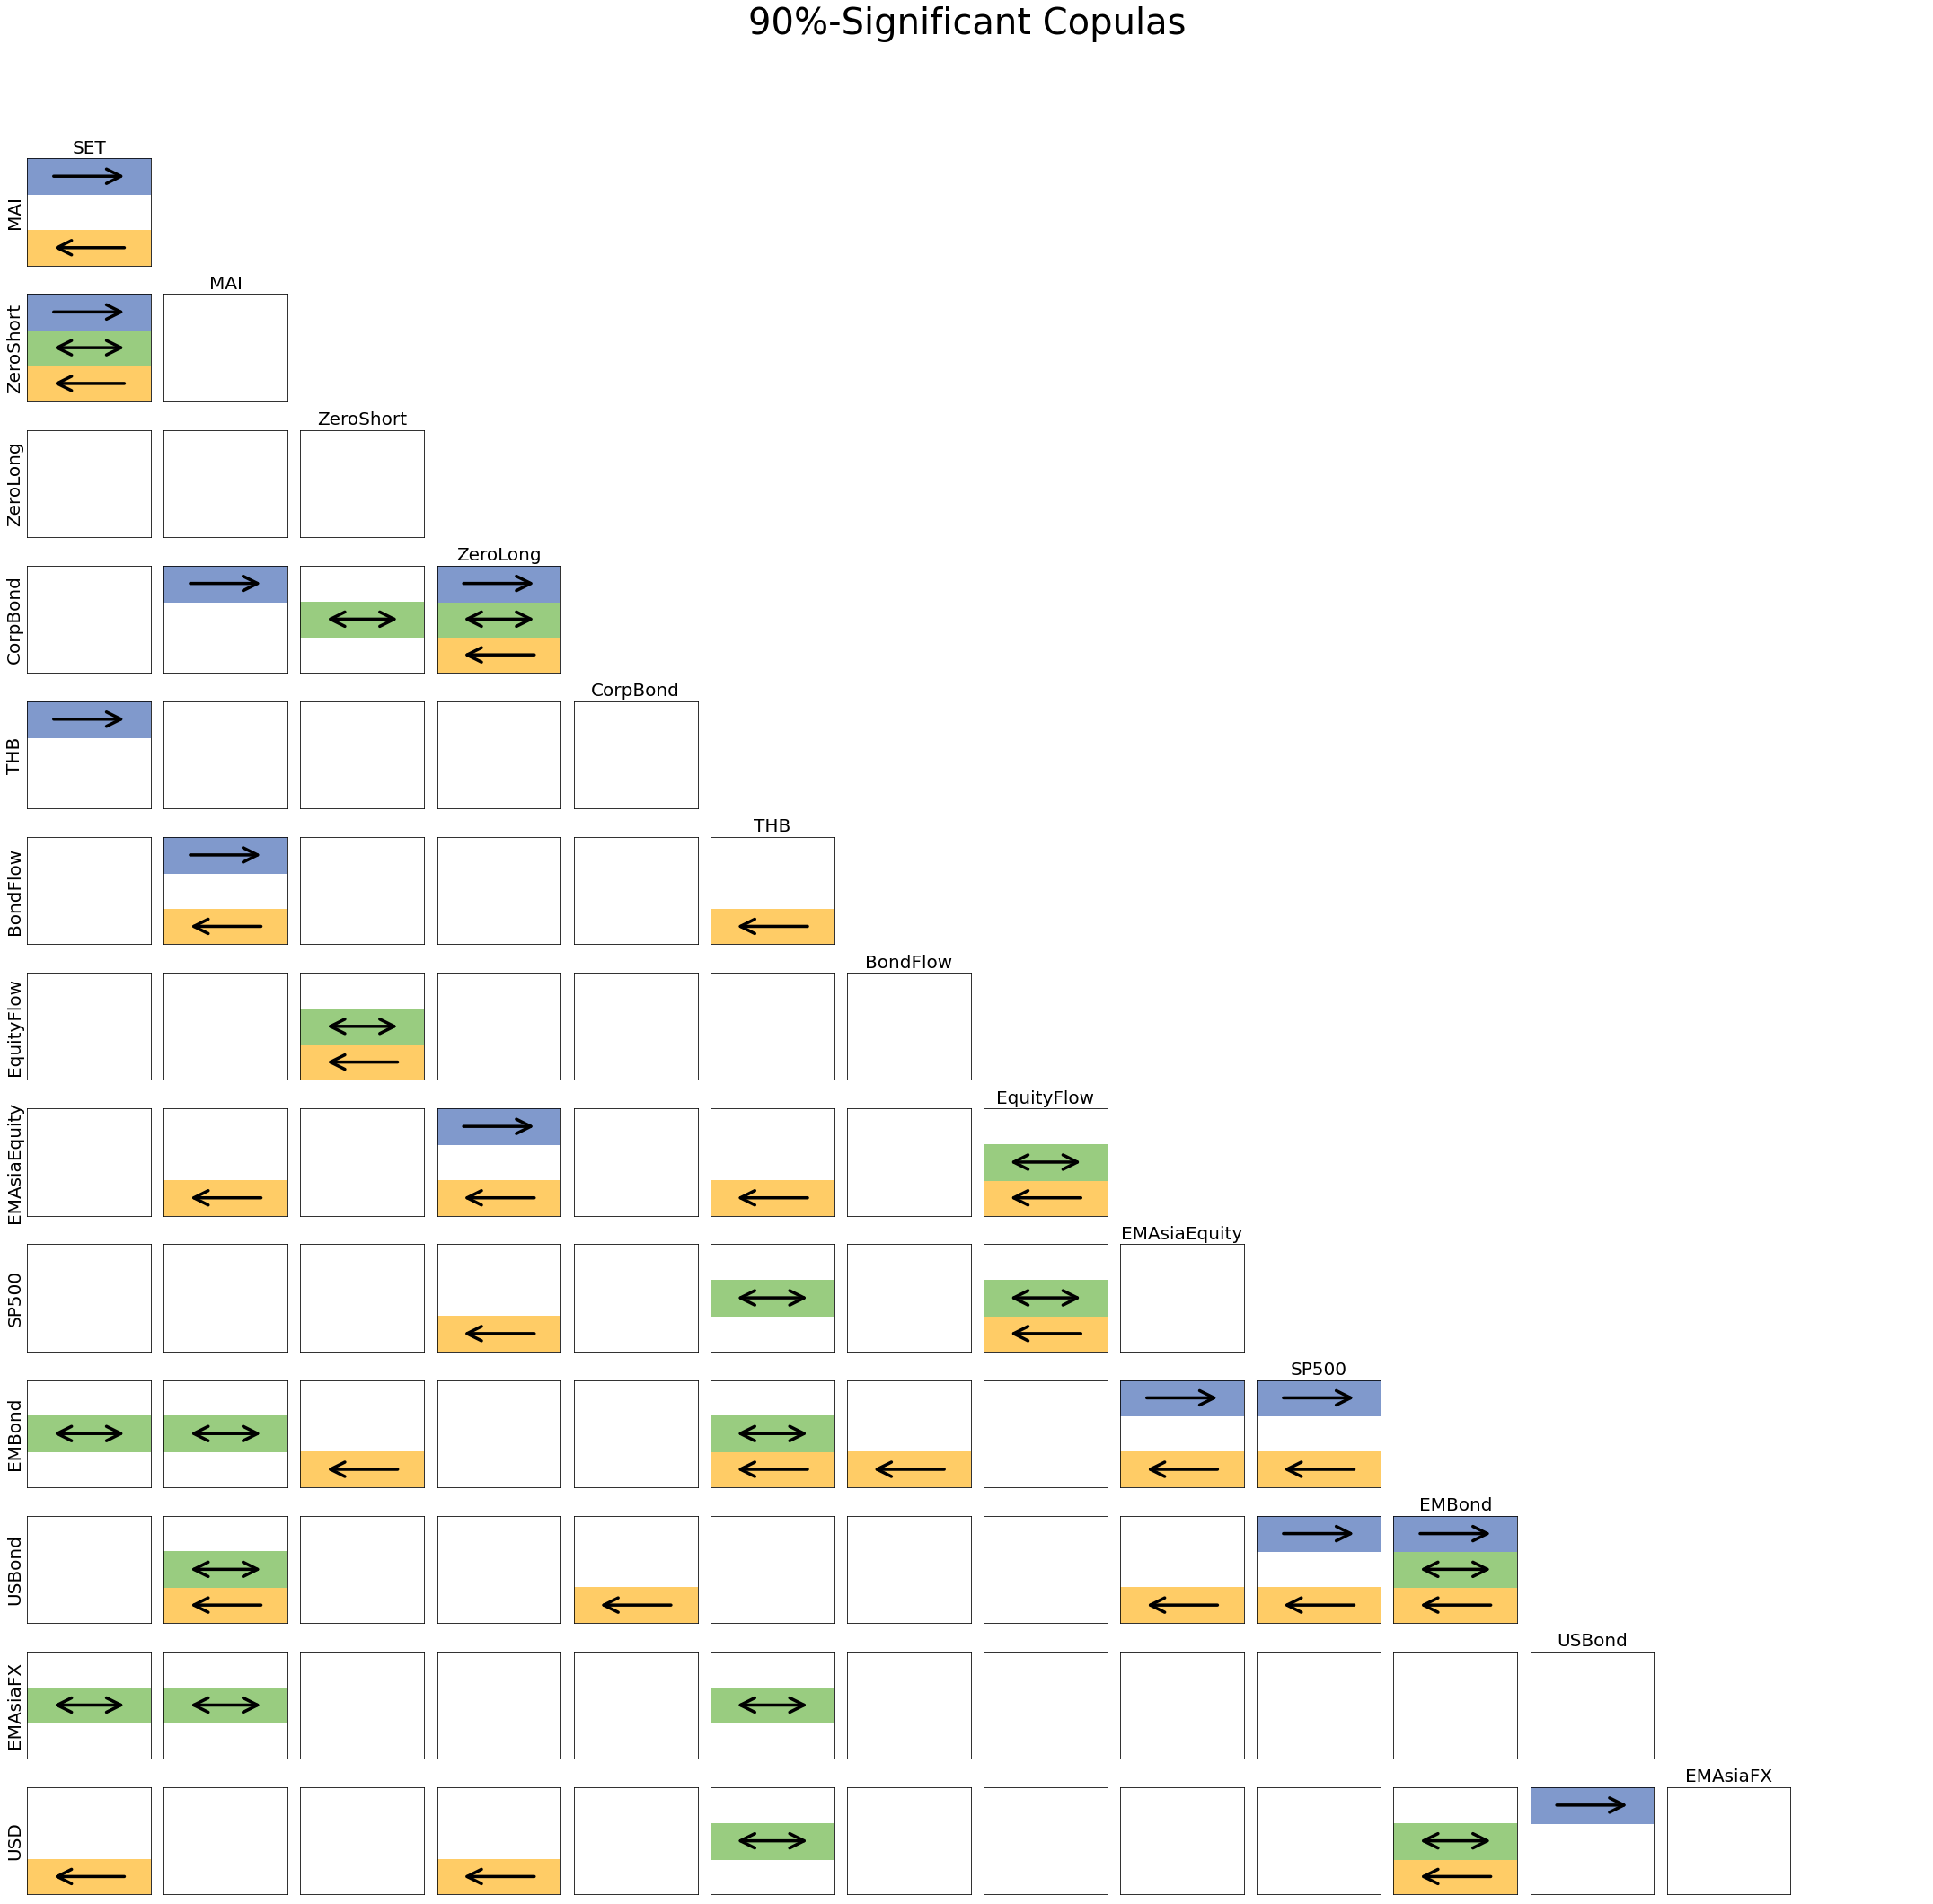

In [26]:
fig, axs = plt.subplots(14, 14, figsize=(30, 30))

cols = list(col.keys())
for i, col1 in enumerate(cols):
  for j, col2 in enumerate(cols):
    ylabel = None if j != 0 else col1
    if i <= j:
      continue
    else:
      if j == i - 1:
        axs[i][j].set_title(col2, fontsize = 20)
      vs = col1 + ' vs ' + col2
      df_temp = data[(data['VS'] == vs) | (data['VS_switch'] == vs)].copy()
      list_sig = df_temp[['RowLag', 'NoLag', 'ColLag']].to_numpy()[0].tolist()
      sort_list_sig = [list_sig[2], list_sig[1], list_sig[0]]

      show_sig = [e if sort_list_sig[i] == 1 else 'n' for i, e in enumerate(['l', 'b', 'r'])]
      plot_3_relationship(axs[i][j], show_sig, ylabel = ylabel)

[ax.get_xaxis().set_visible(False) for row in axs for ax in row]
[ax.get_yaxis().set_visible(False) for row in axs for i, ax in enumerate(row) if i != 0]

[ax.get_yaxis().set_ticks([]) for row in axs for i, ax in enumerate(row)]

[ax.axis('off') for i, row in enumerate(axs) for j, ax in enumerate(row) if i<=j]

plt.suptitle(f'{int(100-(sig*100))}%-Significant Copulas', fontsize = 40)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout()
plt.show()

In [27]:
data_dict = data.set_index(['RowVariable','ColVariable'])

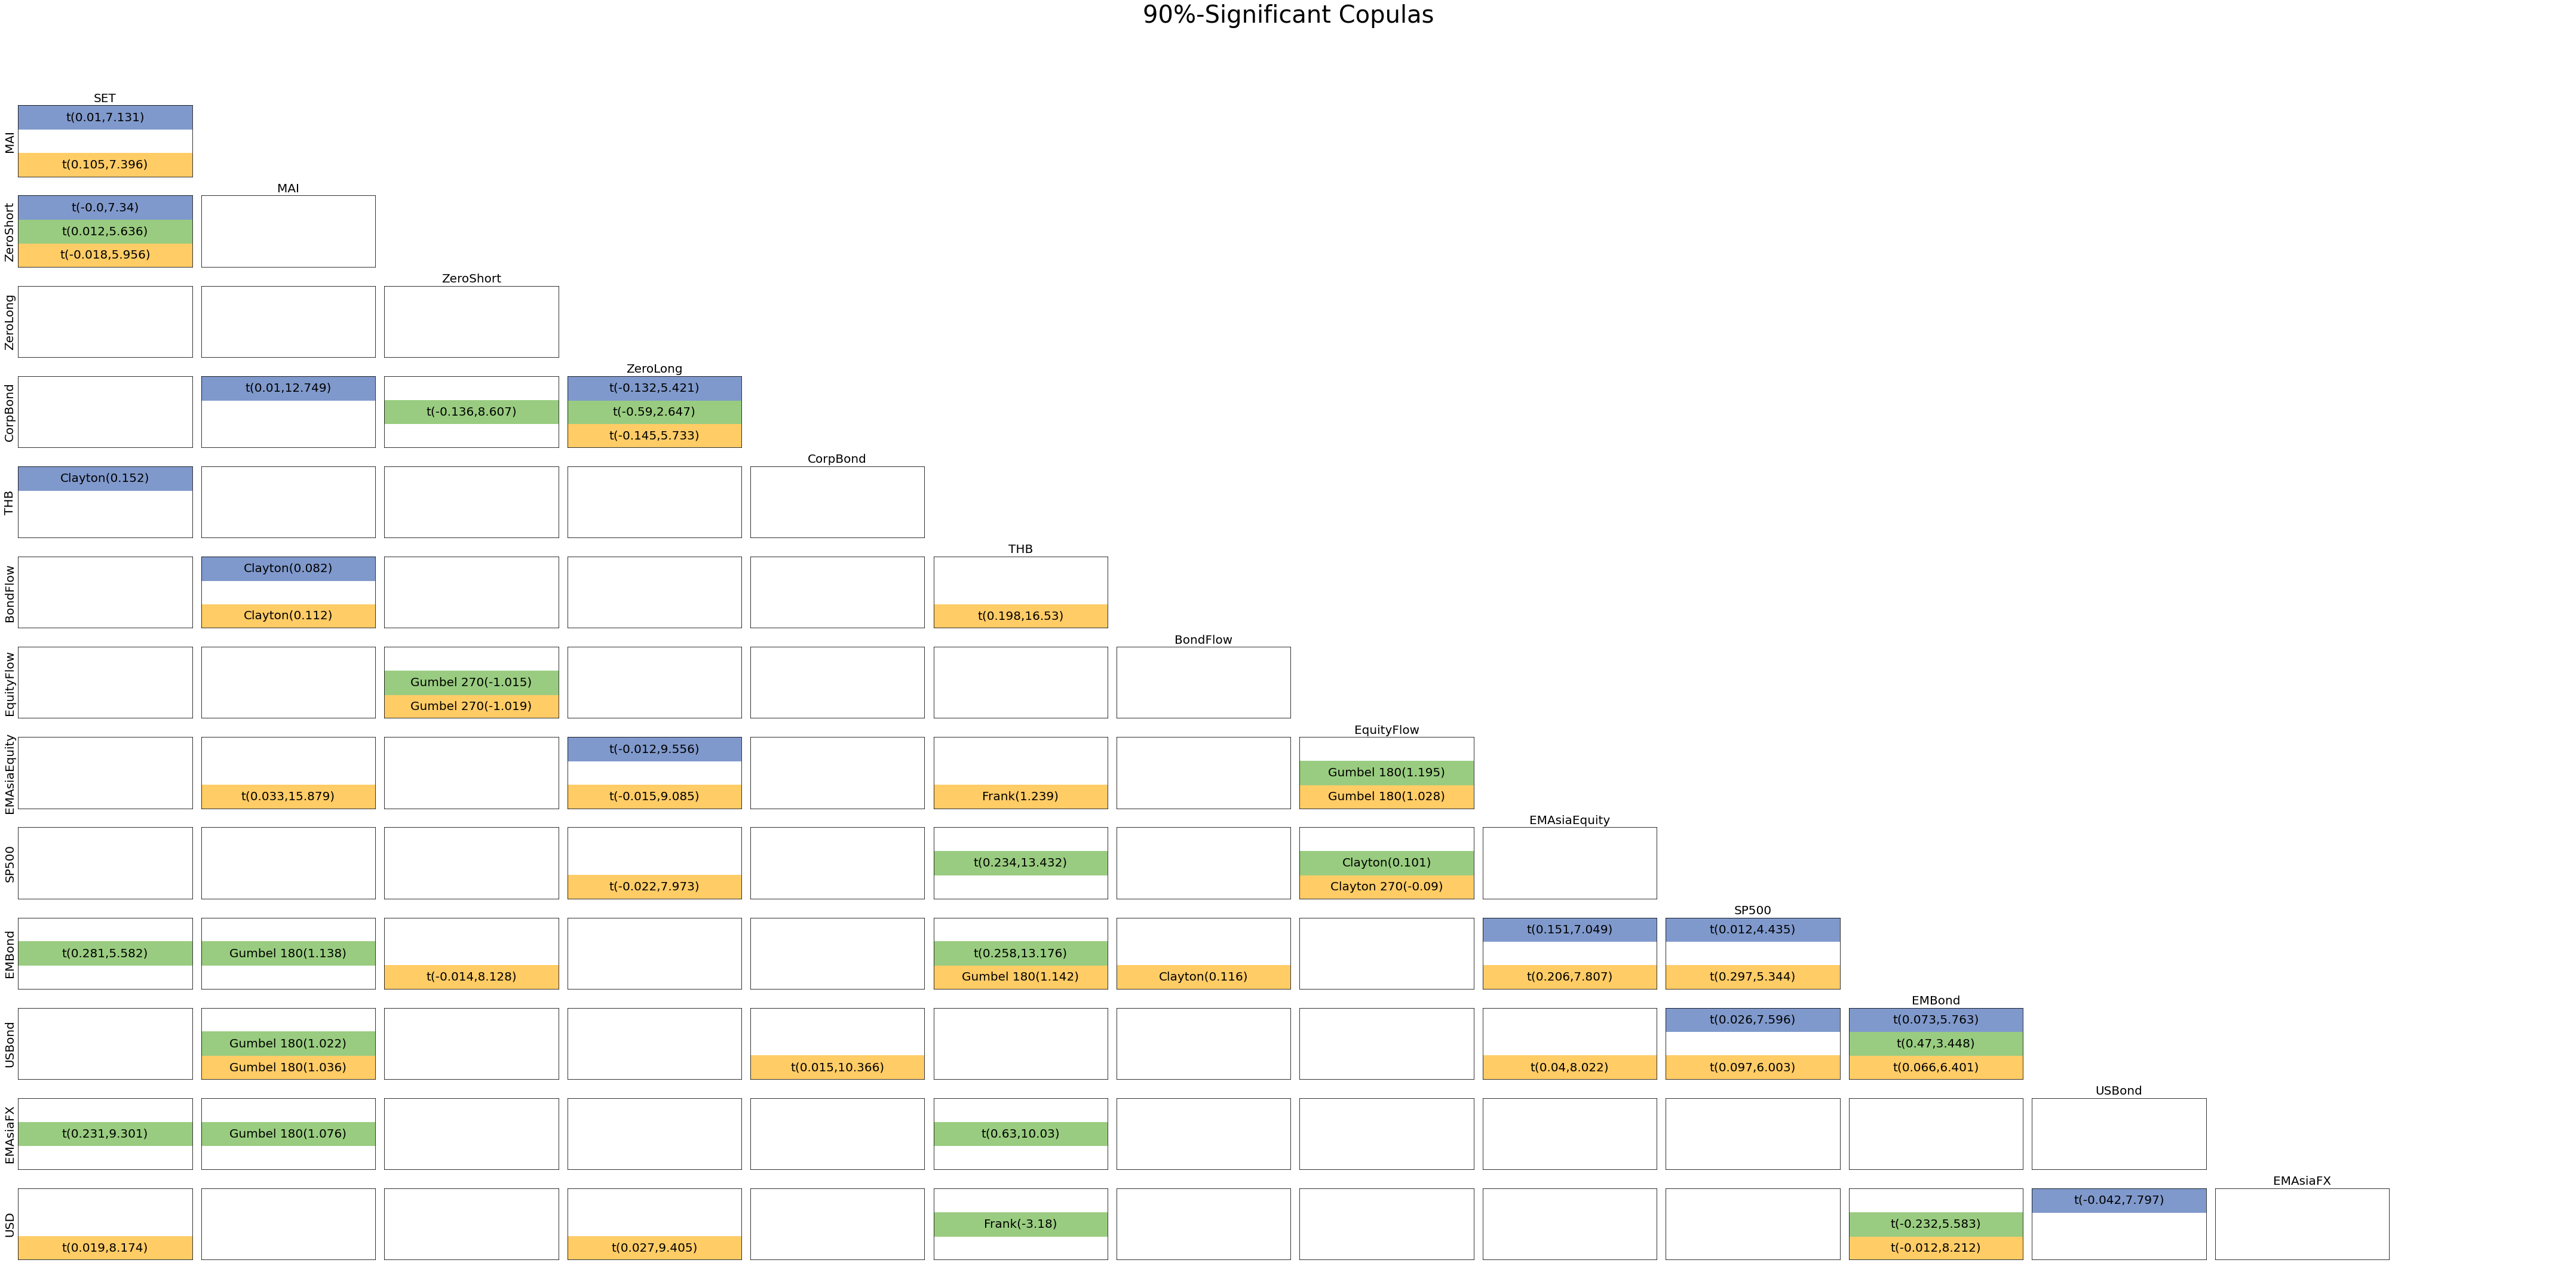

In [28]:
def plot_3_copulae(ax, copulae, colors=[(1, 0.8, 0.4), (0.6, 0.8, 0.5), (0.5, 0.6, 0.8)], ylabel=None, fontsize=20):
    for i, (color, copula) in enumerate(zip(colors, copulae)):
        if copula is not None:
            rect = mpatches.Rectangle((0, i), 1, 1, color=color)
            ax.add_patch(rect)
            ax.text(0+0.5, i+0.5, copula, horizontalalignment='center', verticalalignment='center', fontsize=fontsize)

    ax.set_xlim([0, 1])
    ax.set_ylim([0, len(copulae)])
    
    ax.get_xaxis().set_visible(False)

    if ylabel is None:
        ax.get_yaxis().set_visible(False)
    else:
        ax.set_ylabel(ylabel, fontsize = 20)
        
        
fig, axs = plt.subplots(14, 14, figsize=(60, 30))

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        ylabel = None if j != 0 else col1
        if i <= j:
            continue
        else:
            if j == i - 1:
                axs[i][j].set_title(col2, fontsize = 20)
            vs = col1 + ' vs ' + col2
            df_temp = data[(data['VS'] == vs) | (data['VS_switch'] == vs)].copy()
            list_sig = df_temp[['RowLag', 'NoLag', 'ColLag']].to_numpy()[0].tolist()
            sort_list_sig = [list_sig[2], list_sig[1], list_sig[0]]

            # change this list to the actual copula name
            
            cop = list()
            key = (col1,col2)
            if key not in data_dict.index:
                key = (col2,col1)
                if key not in data_dict.index:
                    continue
            
            if data_dict.loc[key,'RowLag']==1:
                rowlag = data_dict.loc[key,'RowLag_cop']
            else:
                rowlag = None
            if data_dict.loc[key,'NoLag']==1:
                nolag = data_dict.loc[key,'NoLag_cop']
            else:
                nolag = None
            if data_dict.loc[key,'ColLag']==1:
                collag = data_dict.loc[key,'ColLag_cop']
            else:
                collag = None
            copulae = [collag, nolag, rowlag]
            plot_3_copulae(axs[i][j], copulae, ylabel = ylabel, fontsize=20)
            
[ax.get_xaxis().set_visible(False) for row in axs for ax in row]
[ax.get_yaxis().set_visible(False) for row in axs for i, ax in enumerate(row) if i != 0]

[ax.get_yaxis().set_ticks([]) for row in axs for i, ax in enumerate(row)]

[ax.axis('off') for i, row in enumerate(axs) for j, ax in enumerate(row) if i<=j]

plt.suptitle(f'{int(100-(sig*100))}%-Significant Copulas', fontsize = 40)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.tight_layout()
plt.show()